#  Covid Detection using XRay Dataset

In [1]:
import pandas as pd
import os
import shutil

In [2]:
print(os.listdir("./Dataset"))
TRAIN_PATH = "./Dataset/Train"
VAL_PATH = "./Dataset/Val"

['Prediction', 'Train', 'Val']


# Building architecture

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

In [4]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(224,224,3)))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1,activation="sigmoid"))

model.compile(loss=keras.losses.binary_crossentropy,optimizer = "adam",metrics=["accuracy"])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

# Data Augmentation

In [6]:
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)
test_dataset = image.ImageDataGenerator(rescale = 1./255)

In [7]:
train_generator = train_datagen.flow_from_directory(
    './Dataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 822 images belonging to 2 classes.


In [8]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [24]:
validation_generator = test_dataset.flow_from_directory(
    './Dataset/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)
validation_generator.class_indices

Found 60 images belonging to 2 classes.


{'Covid': 0, 'Normal': 1}

# Model Fitting

In [10]:
hist = model.fit(
    train_generator,
    steps_per_epoch = 8,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = 2
)

C:\Users\asus\anaconda3\lib\site-packages\keras\engine\training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
8/8 [==============================] - 36s 3s/step - loss: 0.9086 - accuracy: 0.7207 - val_loss: 0.7064 - val_accuracy: 0.5000
Epoch 2/10
8/8 [==============================] - 27s 3s/step - loss: 0.5152 - accuracy: 0.8261 - val_loss: 0.6974 - val_accuracy: 0.5000
Epoch 3/10
8/8 [==============================] - 31s 4s/step - loss: 0.4969 - accuracy: 0.8436 - val_loss: 0.7268 - val_accuracy: 0.5000
Epoch 4/10
8/8 [==============================] - 31s 4s/step - loss: 0.4691 - accuracy: 0.8159 - val_loss: 0.7192 - val_accuracy: 0.5000
Epoch 5/10
8/8 [==============================] - 36s 5s/step - loss: 0.4713 - accuracy: 0.8129 - val_loss: 0.7343 - val_accuracy: 0.5000
Epoch 6/10
8/8 [==============================] - 37s 4s/step - loss: 0.5511 - accuracy: 0.7794 - val_loss: 0.6874 - val_accuracy: 0.5000
Epoch 7/10
8/8 [==============================] - 34s 4s/step - loss: 0.5207 - accuracy: 0.7889 - val_loss: 0.7064 - val_accuracy: 0.5000
Epoch 8/10
8/8 [==================

# Confusion Matrix

In [17]:
y_actual = []
y_test = []

for i in os.listdir("./Dataset/Val/Covid"):
  img = image.load_img("./Dataset/Val/Covid/"+i,target_size=(224,224,3))
  img = image.img_to_array(img)
  img = np.expand_dims(img,axis=0)
  p = model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(0)

In [18]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

In [19]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
class_names = ["Covid-19","Normal"]

cm = confusion_matrix(y_actual,y_test)
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap="plasma"):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 0 30]
 [ 0  0]]


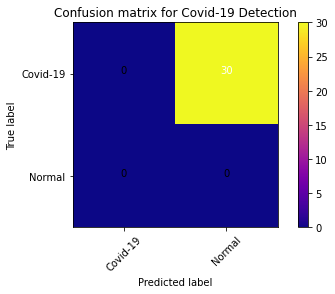

In [20]:
plt.figure()
plot_confusion_matrix(cm, classes=class_names,
                      title='Confusion matrix for Covid-19 Detection',cmap="plasma")

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


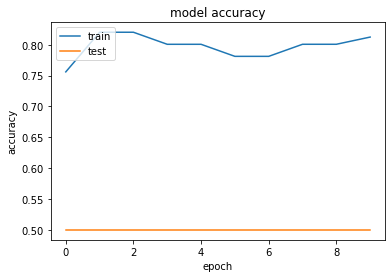

In [21]:
history = hist
print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

This Xray Image is of positive covid-19 patient
Prediction Of Our Model :  Negative for Covid-19


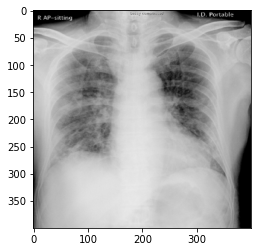

In [22]:
import numpy as np
# from google.colab.patches import cv2_imshow
import cv2
from keras.preprocessing import image
xtest_image = image.load_img('./Dataset/Prediction/ryct.2020200034.fig5-day7.jpeg', target_size = (224, 224,3))
xtest_image = image.img_to_array(xtest_image)
xtest_image = np.expand_dims(xtest_image, axis = 0)
results = model.predict_classes(xtest_image)
# training_set.class_indices
imggg = cv2.imread('./Dataset/Prediction/ryct.2020200034.fig5-day7.jpeg')
print("This Xray Image is of positive covid-19 patient")
imggg = np.array(imggg)
imggg = cv2.resize(imggg,(400,400))
plt.imshow(imggg)
# cv2_imshow(imggg)
# print(results)
if results[0][0] == 0:
    prediction = 'Positive For Covid-19'
else:
    prediction = 'Negative for Covid-19'
print("Prediction Of Our Model : ",prediction)